In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import argparse

def loss_extarection(path):
    """
    extrection the loss infirmation from DiT lof file
    """
    path_for_loss = '/content/loss.txt'
    with open(path, 'r') as log_file, open(path_for_loss, 'w') as loss_file:
        for line in enumerate(log_file):
              string = ''.join(map(str, line))
              if 'Train Loss' in string:
                  loss_file.write(string)
    return path_for_loss

def loss_plot(path):
    """
    making loss plot
    """
    df = pd.read_csv(path, names=['Train Loss', 'Train Steps/sec'])

    # extract information from tuple
    df['Date'], df['Train Loss'] = df['Train Loss'].str.split(' ', 1).str
    df['Time'], df['Train Loss'] = df['Train Loss'].str.split(' ', 1).str
    df['Step'], df['Train Loss'] = df['Train Loss'].str.split(' ', 1).str

    # slicing info from strings
    df.iloc[:, 0] = df.iloc[:, 0].apply(lambda s: s[12:])
    df.iloc[:, 4] = df.iloc[:, 4].apply(lambda s: s[1:-1])
    df_loss = df[['Train Loss', 'Step']]

    # setting epoch value as an index for df_loss
    epoch = []
    step = int(input('How much strings in the log between two Losses? '))  # input of training step freq
    for i in range(df_loss.shape[0]):
      ep = step * i
      epoch.append(ep)
    df_loss['Epoch'] = epoch
    df_loss = df_loss.set_index('Epoch')

    # drawing a plot
    plt.figure(figsize=(15,8))
    plot = sns.lineplot(data=df_loss['Train Loss'])
    plot.tick_params(left=False)

    # reducing anount of printed labels of y axis
    ytick = []
    for i in range(df_loss.shape[0]):
        if i == 0:
            ytick.append(float(df_loss['Train Loss'][i]))
        else:
            ytick.append(' ')
    # print(ytick[-1])
    ytick[-1] = str(min(df_loss['Train Loss']))
    # print(ytick[-1])
    plot.set_yticks(df_loss['Train Loss'])
    plot.set_yticklabels(ytick)

def main(args):
  loss_plot(loss_extarection(args))

In [ ]:
if __name__ == "__main__":
    # parser = argparse.ArgumentParser()
    # parser.add_argument("--log-path", type=str)
    # args = parser.parse_args()
    # main(args)
    path = '/content/log-1.txt'
    main(path)

<ipython-input-50-d8d5902b8987>:19: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df['Date'], df['Train Loss'] = df['Train Loss'].str.split(' ', 1).str
<ipython-input-50-d8d5902b8987>:19: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['Date'], df['Train Loss'] = df['Train Loss'].str.split(' ', 1).str
<ipython-input-50-d8d5902b8987>:20: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df['Time'], df['Train Loss'] = df['Train Loss'].str.split(' ', 1).str
<ipython-input-50-d8d5902b8987>:20: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['Time'], df['Train Loss'] = df['Train Loss'].str.split(' ', 1).str
<ipython-input-50-d8d5902b8987>:21: FutureWarning: In a future version of pandas all arguments of StringMethods.split exce

How much steps between Loss? 5


<ipython-input-50-d8d5902b8987>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss['Epoch'] = epoch


 
0.0291


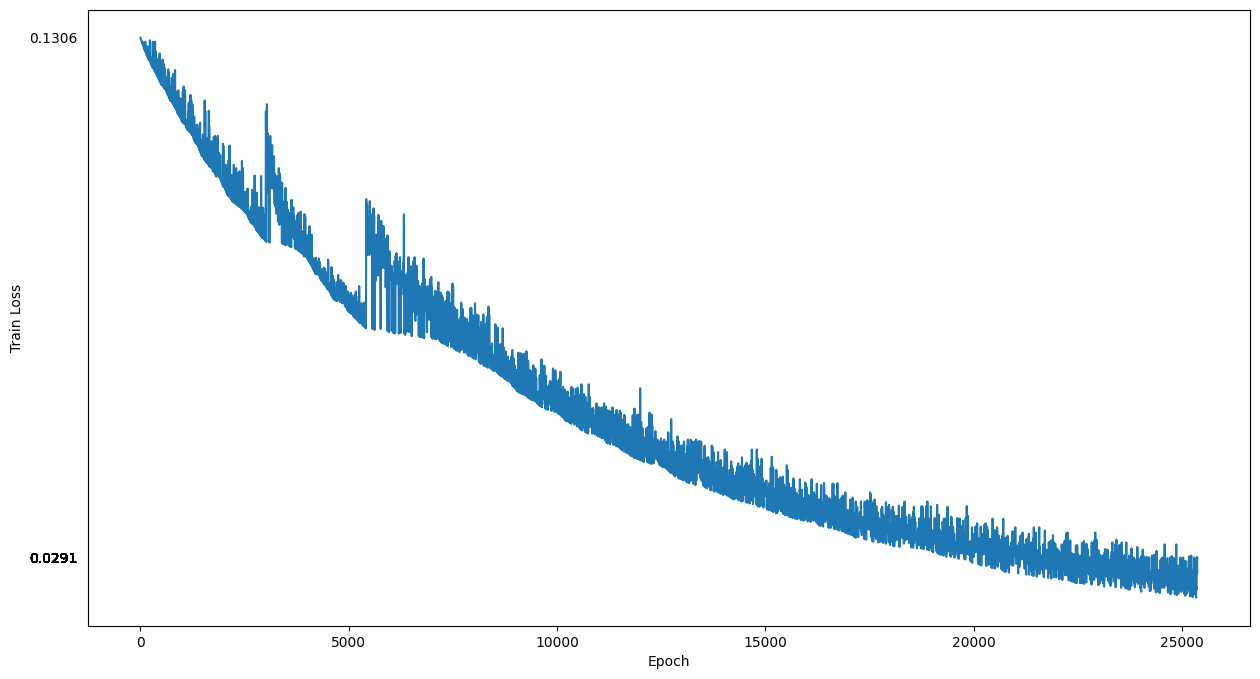

In [ ]:
if __name__ == "__main__":
    # parser = argparse.ArgumentParser()
    # parser.add_argument("--log-path", type=str)
    # args = parser.parse_args()
    # main(args)
    path = '/content/log.txt'
    main(path)

<ipython-input-7-15d49be74466>:25: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df['Date'], df['Train Loss'] = df['Train Loss'].str.split(' ', 1).str
<ipython-input-7-15d49be74466>:25: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['Date'], df['Train Loss'] = df['Train Loss'].str.split(' ', 1).str
<ipython-input-7-15d49be74466>:26: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df['Time'], df['Train Loss'] = df['Train Loss'].str.split(' ', 1).str
<ipython-input-7-15d49be74466>:26: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['Time'], df['Train Loss'] = df['Train Loss'].str.split(' ', 1).str
<ipython-input-7-15d49be74466>:27: FutureWarning: In a future version of pandas all arguments of StringMethods.split except fo

How much strings in the log between two Losses? 5


<ipython-input-7-15d49be74466>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss['Epoch'] = epoch


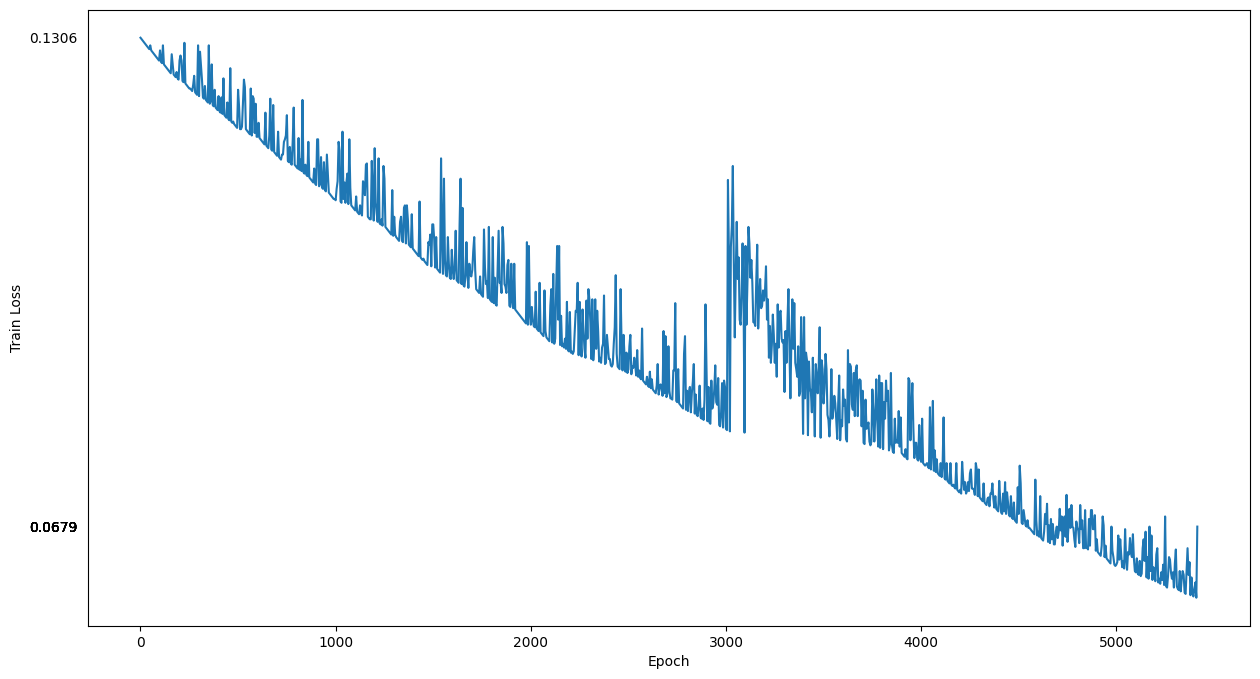

In [ ]:
if __name__ == "__main__":
    # parser = argparse.ArgumentParser()
    # parser.add_argument("--log-path", type=str)
    # args = parser.parse_args()
    # main(args)
    path = '/content/log.txt'
    main(path)